# Week 08: Bessel's Correction

https://dfrieds.com/math/bessels-correction.html

According to Wikipedia (2022):

In statistics, Bessel's correction is the use of n − 1 instead of n in the formula for the sample variance and sample standard deviation, where n is the number of observations in a sample. This method corrects the bias in the estimation of the population variance. It also partially corrects the bias in the estimation of the population standard deviation. However, the correction often increases the mean squared error in these estimations. This technique is named after Friedrich Bessel (para 1).

Bessel's correction. (June 13, 2022). In *Wikipedia*. https://en.wikipedia.org/wiki/Bessel%27s_correction

* [What is bias?](https://stats.libretexts.org/Bookshelves/Applied_Statistics/Book%3A_Answering_Questions_with_Data_-__Introductory_Statistics_for_Psychology_Students_(Crump)/04%3A_Probability_Sampling_and_Estimation/4.13%3A_Estimating_population_parameters)
* [What are degrees of freedom?](https://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/degrees-of-freedom/)
* https://www.geeksforgeeks.org/bessels-correction/

## Degrees of Freedom

* https://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/degrees-of-freedom/
* https://web.itu.edu.tr/~gundes/2dof.pdf

Degrees of freedom are the number of independent values that a statistical analysis can estimate. You can also think of it as the number of values that are free to vary as you estimate parameters. Degrees of freedom is a combination of how much data you have and how many parameters you need to estimate. It indicates how much independent information goes into a parameter estimate. In this vein, it’s easy to see that you want a lot of information to go into parameter estimates to obtain more precise estimates and more powerful hypothesis tests. Calculating degrees of freedom in linear regression is a bit more complicated, and I’ll keep it on the simple side. In a linear regression model, each term is an estimated parameter that uses one degree of freedom. In the regression output below, you can see how each linear regression term requires a DF. There are n = 29 observations, and the two independent variables use a total of two DF. The degrees of freedom formula for total DF = n – 1, which is 29 – 1 = 28 in our example. The degrees of freedom formula for Error DF is: n – P – 1. In our example that is 29 – 2 – 1 = 26.  P is the number of coefficients not counting the constant. The output displays the remaining 26 degrees of freedom in Error.

https://statisticsbyjim.com/hypothesis-testing/degrees-freedom-statistics/

In [1]:
# https://www.tutorialspoint.com/generating-random-number-list-in-python
import random

def list_mean(lst):
    '''
    Returns mean of a list of integers
    
    Parameters:
        List
    Returns:
        Mean (Real Number)
    '''
    return sum(lst) / len(lst)

randomlist = random.sample(range(1, 11), 10)
randomlist_mean = list_mean(randomlist)
print('list', randomlist)
print('mean of list =', randomlist_mean)
randomlist.pop()
randomlist_minus1 = sum(randomlist)
randomlist.append('?')
print(f'What number does ? have to be so that the mean of {randomlist} = {randomlist_mean}')
print(f'{randomlist_minus1} + x = {randomlist_mean}')
print(f'{randomlist_minus1} + x = {randomlist_mean*10}')
print(f'x = {randomlist_mean*10} - {randomlist_minus1} = {randomlist_mean*10 - randomlist_minus1}')

list [9, 2, 4, 3, 7, 8, 6, 10, 5, 1]
mean of list = 5.5
What number does ? have to be so that the mean of [9, 2, 4, 3, 7, 8, 6, 10, 5, '?'] = 5.5
54 + x = 5.5
54 + x = 55.0
x = 55.0 - 54 = 1.0


## Using N to Calculate a Sample's Standard Deviation is Biased

* **Population Mean**: $\mu = \frac{1}{N} \sum_{i=1}^{N} x_i$
* **Population Standard Deviation**: $\sigma = \sqrt{\frac{1}{N}\sum(x-\bar{x})^2}$

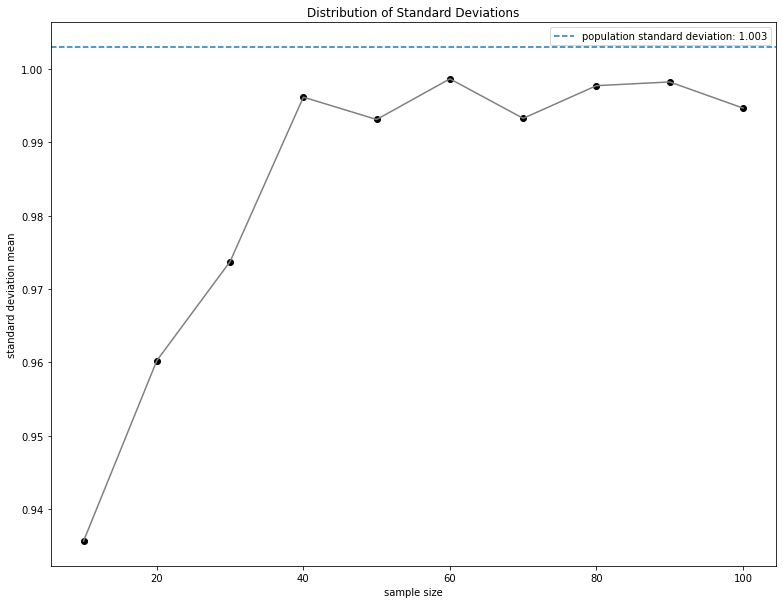

In [2]:
# without Bessel's Correction; ddof = 0
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)
data = np.random.normal(loc=0, scale=1, size=10000) # SAT Scores
iterations_per_sample_size = 150
sample_size_range = range(10, 105, 10)
df = pd.DataFrame(data={'sample_size': [], 'standard_deviation': []})

y_means = []
for sample_size in sample_size_range:
    sample_standard_deviations = []
    for i in range(0, iterations_per_sample_size):
        random_sample_values = np.random.choice(data, size=sample_size, replace=False)        
        sample_std_dev = np.std(random_sample_values, ddof=0)        
        sample_standard_deviations.append(sample_std_dev)

    y_means.append(np.mean(sample_standard_deviations))

pop_std = round(np.std(data), 3)
x_range = [s for s in sample_size_range]

plt.figure(figsize=(13, 10))
plt.scatter(x_range, y_means, color='black')
plt.plot(x_range, y_means, color='gray')
plt.title('Distribution of Standard Deviations')
plt.xlabel('sample size')
plt.ylabel('standard deviation mean')
plt.axhline(y=pop_std, label=f'population standard deviation: {pop_std.round(3)}', linestyle='--')
# plt.ylim(.5, 1.5)
plt.legend();

## Using n - 1 is Unbiased

* **Sample Mean**: $\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i$
* **Sample Standard Deviation**: $s = \sqrt{\frac{1}{n-1}\sum(x-\bar{x})^2}$

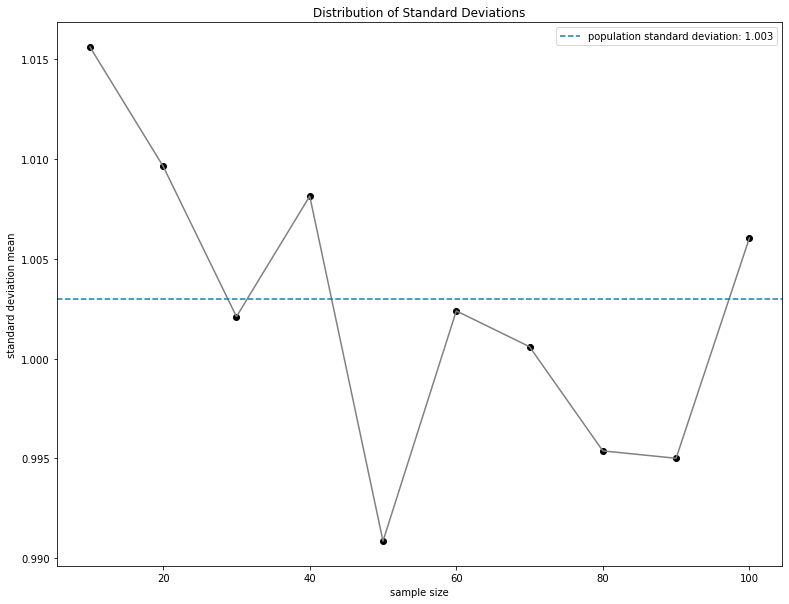

In [3]:
# with Bessel's Correction; ddof = 1
df = pd.DataFrame(data={'sample_size': [], 'standard_deviation': []})

y_means = []
for sample_size in sample_size_range:
    sample_standard_deviations = []
    for i in range(0, iterations_per_sample_size):
        random_sample_values = np.random.choice(data, size=sample_size, replace=False)        
        sample_std_dev = np.std(random_sample_values, ddof=1)        
        sample_standard_deviations.append(sample_std_dev)
        
    y_means.append(np.mean(sample_standard_deviations))

plt.figure(figsize=(13, 10))
plt.scatter(x_range, y_means, color='black')
plt.plot(x_range, y_means, color='gray')
plt.title('Distribution of Standard Deviations')
plt.xlabel('sample size')
plt.ylabel('standard deviation mean')
plt.axhline(y=pop_std, label=f'population standard deviation: {pop_std.round(3)}', linestyle='--')
# plt.ylim(.5, 1.5)
plt.legend();